In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [2]:
RISK_FREE_RATE = 0.05
MONTHS_IN_YEAR = 12


In [5]:
class CAPM:
    
    def __init__(self,stocks,start_date, end_date):
        self.data = None
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date
        
    def download_data(self):
        data = {}
        
        for stock in self.stocks:
            ticker = yf.download(stock, self.start_date, self.end_date)
            data[stock] = ticker["Adj Close"]
            
        return pd.DataFrame(data)
    
    
    def initialize(self):
        stock_data = self.download_data()
        stock_data = stock_data.resample('M').last()
        #print(stock_data)
        self.data = pd.DataFrame({'s_adjclose': stock_data[self.stocks[0]], 
                                   'm_adjclose' : stock_data[self.stocks[1]] })
        #print(self.data)
        self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_adjclose', 'm_adjclose']]/self.data[['s_adjclose', 'm_adjclose']].shift(1))
        self.data = self.data[1:]
        print(self.data)
    
    def calculate_beta(self):
        covariance_matrix = np.cov(self.data['s_returns'],self.data['m_returns'])
        beta = covariance_matrix[0,1]/covariance_matrix[1,1]
        print("Beta from the formula:", beta)
    
   
    def regression(self):
        beta,alpha = np.polyfit(self.data['m_returns'],self.data['s_returns'], deg = 1)
        print("Beta from regression", beta)
        expected_return = RISK_FREE_RATE + beta*(self.data['m_returns'].mean()*MONTHS_IN_YEAR - RISK_FREE_RATE)
        print("Expected Return:", expected_return)
        self.plot_regression(alpha,beta)
    
    def plot_regression(self,alpha,beta):
        fig,axis = plt.subplots(1, figsize=(20,10))
        axis.scatter(self.data['m_returns'],self.data['s_returns'],label = 'Data Points')
        axis.plot(self.data['m_returns'],alpha + beta*self.data['m_returns'], color = 'red', label = "CAPM line")
        plt.title('Capital Asset Pricing Models, finding alphas and betas')
        plt.xlabel('Mkt returns')
        plt.ylabel('Stock returns')
        plt.legend()
        plt.grid(True)
        plt.show()
    
        
        

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            s_adjclose   m_adjclose  s_returns  m_returns
Date                                                     
2010-01-31   84.556068  1073.869995  -0.067221  -0.037675
2010-02-28   88.244499  1104.489990   0.042697   0.028115
2010-03-31   89.000916  1169.430054   0.008535   0.057133
2010-04-30   89.521362  1186.689941   0.005831   0.014651
2010-05-31   87.371498  1089.410034  -0.024308  -0.085532
...                ...          ...        ...        ...
2016-08-31  128.313599  2170.949951  -0.002293  -0.001220
2016-09-30  128.289398  2168.270020  -0.000189  -0.001235
2016-10-31  124.122078  2126.149902  -0.033023  -0.019617
2016-11-30  132.199585  2198.810059   0.063047   0.033604
2016-12-31  135.271896  2238.830078   0.022974   0.018037

[84 rows x 4 columns]
Beta from the formula: 0.7301124251262726
Beta from regression 0.730112425126272
Expe

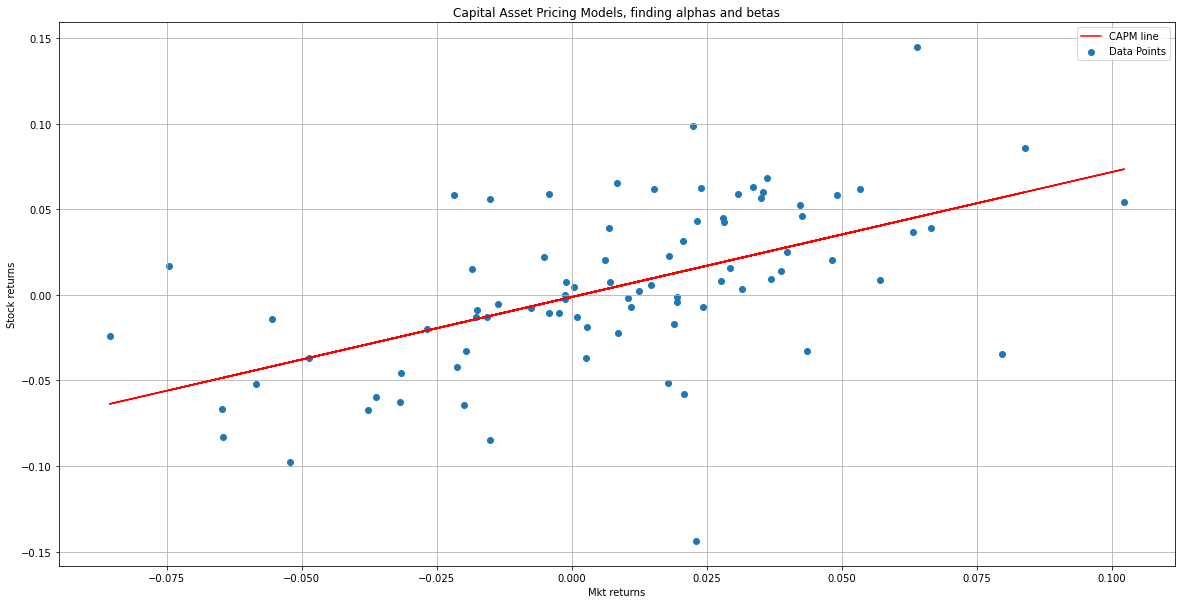

In [6]:
if __name__ == '__main__':
    capm = CAPM(['IBM', '^GSPC'],'2010-01-01','2017-01-01')
    capm.initialize()
    capm.calculate_beta()
    capm.regression()

# beta value < 1 then not riskier than market. hence expect lower returns than market.